# Visualizing Data with Matplotlib
## Countries of the World Data & Iris Flowers Data
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set default plot style
plt.style.use('seaborn-v0_8-bright')

# Customize specific plot elements
custom_params = {
    'font.family': 'Arial',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 14
}

plt.rcParams.update(custom_params)

### 1. Create a NumPy array of 500 points with a normal distribution, a mean of 100 and a standard deviation of 10.

In [2]:
norm_dist_array = np.random.normal(100, 10, 500)

# Confirm that norm_dist_array has 500 data points
norm_dist_array.size

500

---
### 2. Create a histogram using Matplotlib using the array.

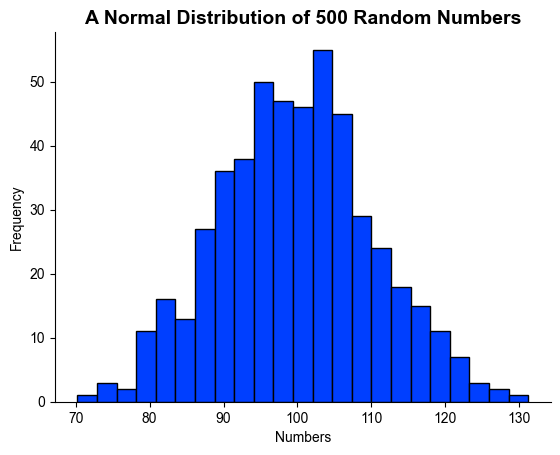

In [3]:
# Declare new Axes object called norm_dist_histogram
norm_dist_histogram = plt.axes()

# Display norm_dist_array data as histogram and customize appearance
norm_dist_histogram.hist(norm_dist_array, bins = 23, edgecolor = 'black')
norm_dist_histogram.set(xlabel = 'Numbers', ylabel = 'Frequency',
                        title = 'A Normal Distribution of 500 Random Numbers')

plt.show()

---
### 3. Read CountriesWorld.csv into a data frame.

In [4]:
countries_df = pd.read_csv('CountriesWorld.csv')

In [5]:
# Show the first five rows of countries_df
countries_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy,Phones (per 1000),Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [6]:
# Check for duplicate rows
print(f'There are {countries_df.duplicated().sum()} duplicated rows in this dataset.')

There are 0 duplicated rows in this dataset.


---
### 4. Create a scatter plot of `GDP ($ per capita)` versus `Literacy`.

#### Clean the data

In [7]:
# Pull data only from the 'GDP ($ per capita)' and 'Literacy' columns and assign to df_subset
df_subset = countries_df[['GDP ($ per capita)', 'Literacy']]

# Check for NaNs in df_subset
df_subset.isna().sum()

GDP ($ per capita)     1
Literacy              18
dtype: int64

In [8]:
# Get the rows with NaNs in the 'GDP ($ per capita)' and 'Literacy' columns from countries_df
bool_condition = countries_df['GDP ($ per capita)'].isna() | countries_df['Literacy'].isna()
columns = ['Country', 'Region', 'GDP ($ per capita)', 'Literacy']

countries_df[bool_condition][columns]

,Country,Region,GDP ($ per capita),Literacy
25,Bosnia & Herzegovina,EASTERN EUROPE,6100.0,NaN
66,Faroe Islands,WESTERN EUROPE,22000.0,NaN
74,Gaza Strip,NEAR EAST,600.0,NaN
78,Gibraltar,WESTERN EUROPE,17500.0,NaN
80,Greenland,NORTHERN AMERICA,20000.0,NaN
85,Guernsey,WESTERN EUROPE,20000.0,NaN
99,Isle of Man,WESTERN EUROPE,21000.0,NaN
104,Jersey,WESTERN EUROPE,24800.0,NaN
108,Kiribati,OCEANIA,800.0,NaN
123,Macedonia,EASTERN EUROPE,6700.0,NaN


Since values in both the `GDP ($ per capita)` and `Literacy` columns are required for a scatterplot, the 18 rows of null values shown above will be dropped from `df_subset`.

In [9]:
# Drop the NaNs from df_subset
df_subset = df_subset.dropna()

print(f'There are now {df_subset.isna().sum().sum()} null values in df_subset.')

There are now 0 null values in df_subset.


#### Create the scatterplot

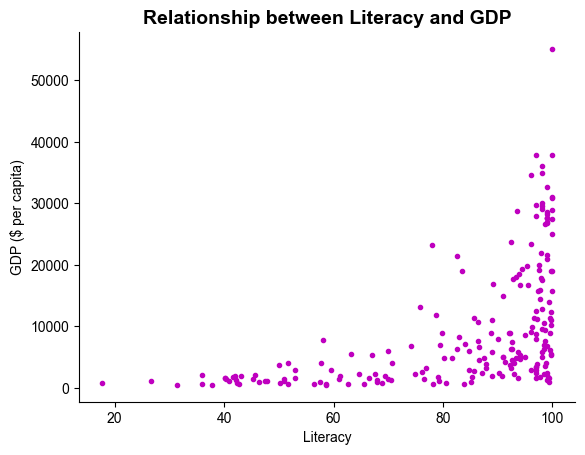

In [10]:
# Declare new Axes object called gdp_lit_scatter
gdp_lit_scatter = plt.axes()

# Display scatterplot and customize appearance
gdp_lit_scatter.scatter(df_subset['Literacy'], df_subset['GDP ($ per capita)'], marker = '.', color = 'm')
gdp_lit_scatter.set(xlabel = 'Literacy', ylabel = 'GDP ($ per capita)', 
                    title = 'Relationship between Literacy and GDP')

plt.show()

---
### 5. Read iris.json into a data frame.

In [11]:
iris_df = pd.read_json('iris.json')

In [12]:
# Show the first five rows of iris_df
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Check for duplicate rows
print(f'There are {iris_df.duplicated().sum()} duplicated rows in this dataset.')

There are 1 duplicated rows in this dataset.


#### Clean the data

In [14]:
# Remove duplicate rows
iris_df = iris_df.drop_duplicates()

print(f'There are now {iris_df.duplicated().sum()} duplicated rows in this dataset.')

There are now 0 duplicated rows in this dataset.


---
### 6. Create a pivot data frame that shows the average petal width per species.

In [15]:
# Create pivot table and assign to pivot_df
pivot_df = iris_df.pivot_table('petal_width', index = 'species', aggfunc = 'mean')
pivot_df

,petal_width
species,
setosa,0.246000
versicolor,1.326000
virginica,2.028571


In [16]:
# Check that this pivot table matches the average petal width by species from the groupby method
iris_df.groupby('species')['petal_width'].mean()

species
setosa        0.246000
versicolor    1.326000
virginica     2.028571
Name: petal_width, dtype: float64

In [17]:
type(pivot_df['petal_width'])

pandas.core.series.Series

---
### 7. Make a bar plot for the pivot table showing species versus average petal width.

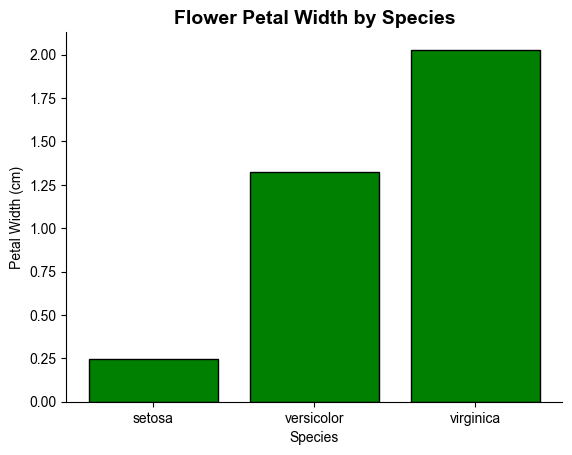

In [18]:
# Declare new Axes object called sp_petal_w_bar
sp_petal_w_bar = plt.axes()

# Display scatterplot and customize appearance
sp_petal_w_bar.bar(pivot_df.index, pivot_df['petal_width'], color = 'g', edgecolor = 'black')
sp_petal_w_bar.set(xlabel = 'Species', ylabel = 'Petal Width (cm)', 
                    title = 'Flower Petal Width by Species')

plt.show()

---